In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from src.data.dataset import PancreasDataset
from src.data.transforms import standard_transforms 
from src.utils.config import load_config
from src.data.transforms import standard_transforms, build_transforms_from_config
from src.data.augmentation import build_augmentations_from_config
from src.data.augmentation import standard_augmentations, Augment
from src.utils.visualization import visualize_sample, visualize_label_mask

In [3]:
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

In [4]:
config = load_config()
RAW_DIR = config['data']['raw_dir']
ods = PancreasDataset(
    data_dir=RAW_DIR,
    split_file='data/splits/one.json',
    split_type='train',
    transform=standard_transforms
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


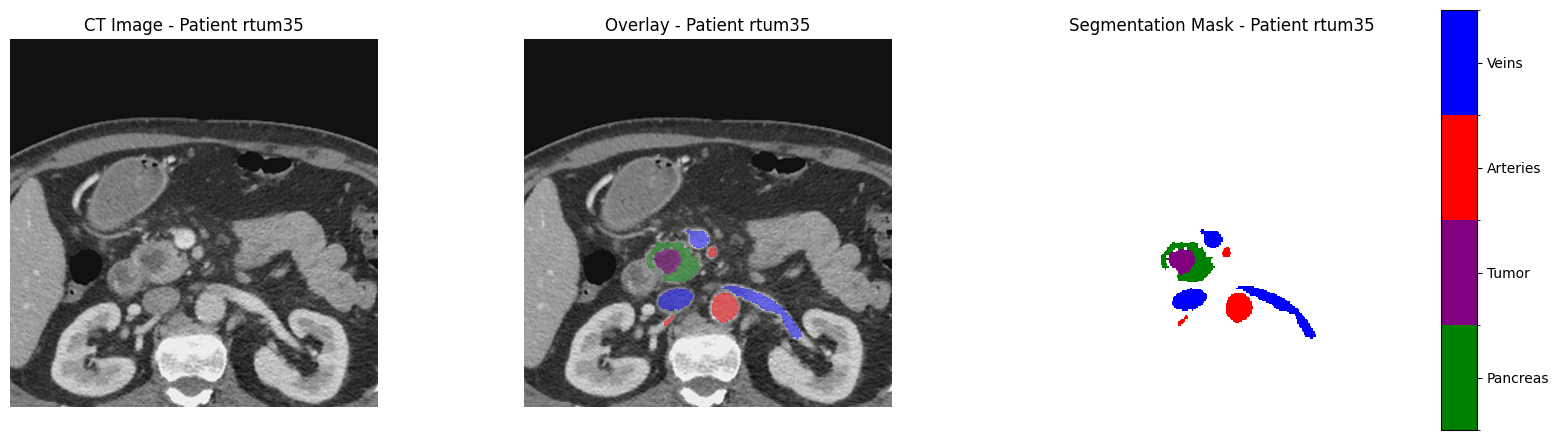

In [5]:
visualize_sample(ods, 28, alpha=0.5, zoom=0.0)

# Testing __transforms__ and __augmentations__

In [6]:
transforms_config = load_config('configs/experiments/one_deep.yaml').get('transforms', None)
print(transforms_config)
aug_config = load_config('configs/experiments/one_deep.yaml').get('augmentations', None)
print(aug_config)
transforms = build_transforms_from_config(transforms_config)
augment = build_augmentations_from_config(aug_config)

[{'ApplyWindow': {'window_level': 50, 'window_width': 400}}, {'Normalize': {}}, {'CropBorders': {'crop_size': 120}}, {'Resize': {'size': [8, 8]}}, {'ToTensor': {}}]
[{'Affine': {'scale': [0.95, 1.05], 'translate_percent': [0.02, 0.02], 'rotate': [-10, 10], 'p': 0.2}}, {'RandomBrightnessContrast': {'brightness_limit': 0.2, 'contrast_limit': 0.2, 'p': 0.3}}, {'GaussianBlur': {'blur_limit': [3, 7], 'p': 0.3}}, {'ElasticTransform': {'alpha': 1.0, 'sigma': 50, 'p': 0.3}}, {'GridDistortion': {'num_steps': 5, 'distort_limit': 0.3, 'p': 0.3}}, {'ToTensorV2': {}}]


In [7]:
tods = PancreasDataset(
    data_dir=RAW_DIR,
    split_file='data/splits/one.json',
    split_type='train',
    transform=None,
    augment=augment
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


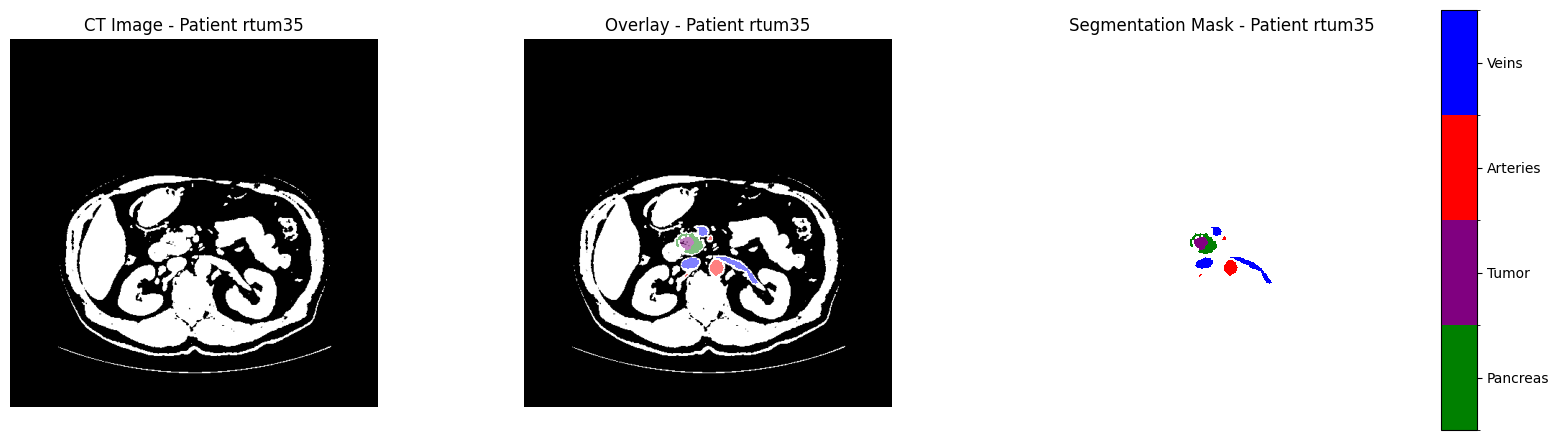

In [8]:
visualize_sample(tods, 28, alpha=0.5, zoom=0.0)

# Testing __full data load__

In [9]:
full_dataset = PancreasDataset(
    data_dir=RAW_DIR,
    split_file='data/splits/train_test_split.json',
    split_type='all',
    transform=None,
    augment=None
)

📊 Loading dataset (all)... 88 patients found.
📊 Dataset loaded with 8834 slices.


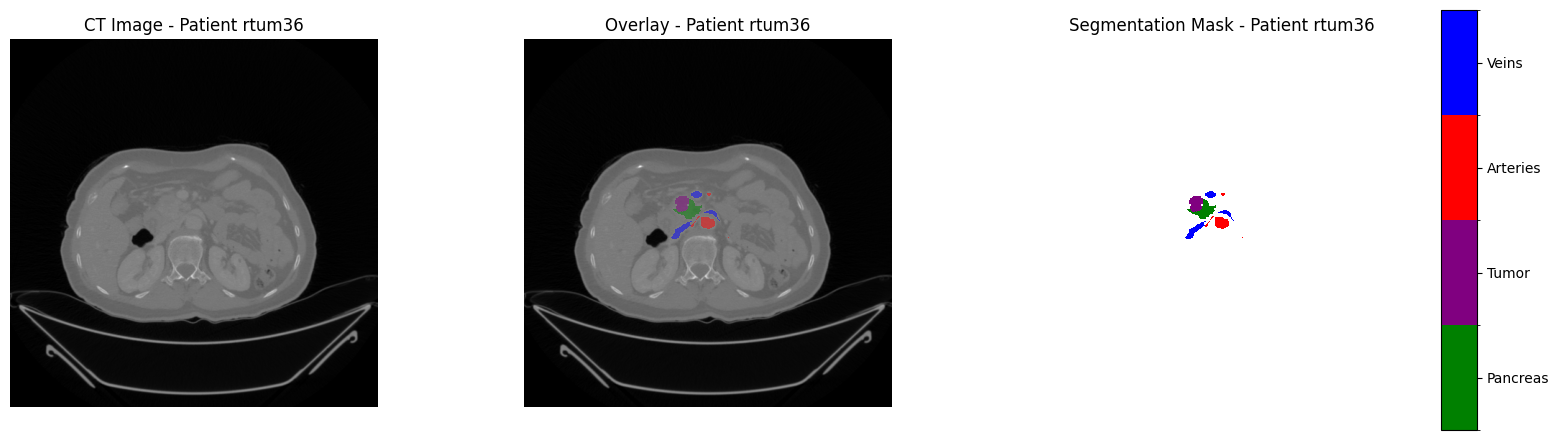

In [10]:
visualize_sample(full_dataset, 2800, alpha=0.5, zoom=0.0)